In [62]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser='auto')

In [102]:
X, y = fetch_openml('mnist_784',return_X_y = True)
X = X.T # 配 合 本 文 對 於 圖 像 矩 陣 的 定 義 p x N

c:\Users\user\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


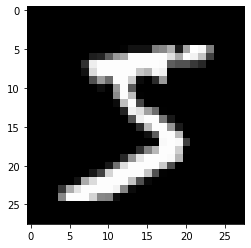

In [104]:
import matplotlib.pyplot as plt
import numpy as np
i = 0
img = X.iloc[:, i]
sz = np.sqrt(len(img)).astype('int')
plt.imshow(np.array(img).reshape(sz, sz), cmap='gray')
plt.show()


In [105]:
def montage(A, m, n):
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
                A[:, i*n+j].reshape(sz, sz)
    return M

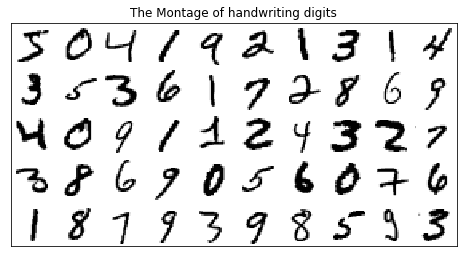

In [106]:
plt.figure(figsize = (8, 12))
m, n = 5, 10  # m x n montage (total mn images)
M = montage(np.array(X), m, n)
plt.imshow(M, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()


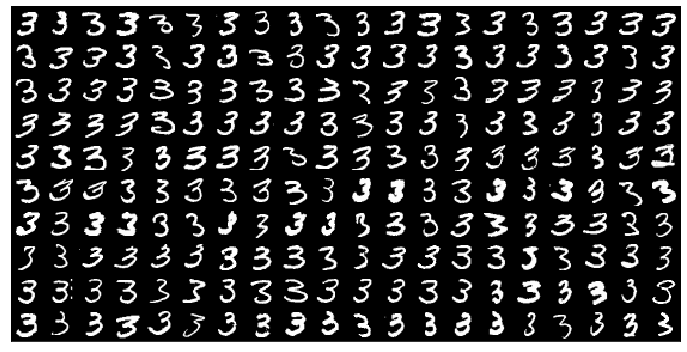

In [108]:
digit_to_show = '3'
idx = y[y==digit_to_show].index
Digit = X.iloc[:, idx]
plt.figure(figsize = (12, 12))
m, n = 10, 20 # A m x n montage (total mn images)
M = montage(np.array(Digit), m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.show()


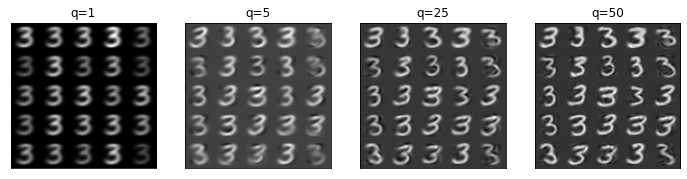

In [109]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# X = Digit
U, E, VT = svd(Digit,full_matrices = False )  # full_matrices = False (到 r) 
q = np.array([1, 5, 25,50])
# q = 5
m, n = 5, 5
fig, ax = plt.subplots(1, len(q) , figsize=(12, 4))

for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(montage(Xq, m, n), cmap ='gray')
    ax[i].set_title('q={}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

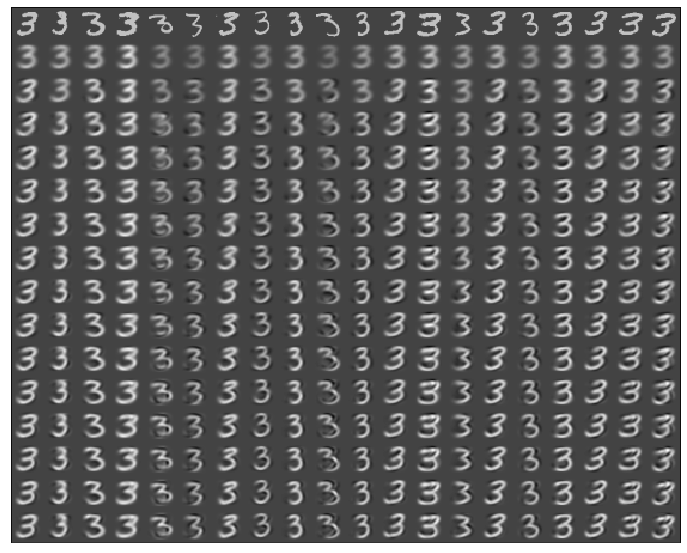

In [115]:
N=20
M=np.array(Digit)[:,0:N]
q=np.arange(1,31,2)
U,E,VT = svd(Digit,full_matrices=False)
for i,r in enumerate(q):
    Xq = U[:,:r]@np.diag(E[:r])@ VT[:r,:]
    M = np.c_[M,Xq[:,:N]] #原始放在第一行 其他的放在後面
plt.figure(figsize=(12,12))
plt.imshow(montage(M,len(q)+1,N),cmap='gray',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.show

In [ ]:
#讀取所有圖片並串聯成montage
def montage_v2(A,m,n):
    sz=np.sqrt(A.shape[0]).astype("int")
    M= np.zeros((sz*m, sz*n))

    for i in range(m*n):
        row = (i//n)*sz
        col = (i%n) *sz
        M[row: row*sz, col: col*sz]= A[:, i].reshape(sz,sz)
    return M